In [2464]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2532]:
df = pd.read_csv('/Users/lucas_botella/Downloads/df_covid_processed.csv')
del df['Unnamed: 0']
df = df[df['Code']!='ECU']
#df = df[df['Code']!='ESP']
#df=df[(df['Date'] > '2020-10-01')]
#df=df[(df['Code'] == 'ESP') | (df['Code'] == 'ITA') | (df['Code'] == 'GRE') | (df['Code'] == 'POR')]
df

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,doctors_per_1000,nurses_per_1000,beds_per_1000,number_of_arrivals,urban_population,total_vaccinations_per_100,%youth_unemployment_total,life_expectancy,"Excess mortality P-scores, all ages Prev 18 days","Excess mortality P-scores, all ages"
0,AUS,2020-03-09,0.844429,1.513714,-1.051571,6.238714,-1.572286,9.373571,2.0,1.0,...,3.75,11.92,3.84,8263000.0,85.904,NaN,11.84,82.748780,6.18,4.92
1,AUS,2020-03-16,0.979571,2.061143,-1.204286,8.938714,-0.102000,11.000000,2.0,1.0,...,3.75,11.92,3.84,8263000.0,85.904,NaN,11.84,82.748780,4.53,4.67
2,AUS,2020-03-23,1.285714,7.040857,-0.816143,8.061143,-0.816286,10.183857,2.0,1.0,...,3.75,11.92,3.84,8263000.0,85.904,NaN,11.84,82.748780,4.92,4.62
3,AUS,2020-03-30,-0.122286,10.122429,0.102000,2.061143,-1.755143,5.979571,2.0,1.0,...,3.75,11.92,3.84,8263000.0,85.904,NaN,11.84,82.748780,4.67,7.28
4,AUS,2020-04-06,-4.489857,23.734571,2.449000,-11.000000,-12.081571,5.081571,2.0,1.0,...,3.75,11.92,3.84,8263000.0,85.904,NaN,11.84,82.748780,4.62,12.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,USA,2021-01-18,-25.224571,-9.775571,14.102286,-41.081571,-15.591714,-44.102000,1.0,3.0,...,2.61,11.89,2.87,75608000.0,82.058,NaN,8.30,78.539024,41.07,36.74
2078,USA,2021-01-25,-23.653143,-10.571429,12.591857,-40.000000,-20.244857,-34.122429,1.0,3.0,...,2.61,11.89,2.87,75608000.0,82.058,NaN,8.30,78.539024,44.75,33.91
2079,USA,2021-02-01,-24.387714,-11.836714,10.897857,-39.938714,-22.000000,-27.754857,1.0,3.0,...,2.61,11.89,2.87,75608000.0,82.058,0.307500,8.30,78.539024,36.74,29.53
2080,USA,2021-02-08,-25.040857,-13.693857,10.816143,-40.816429,-17.673571,-29.857143,1.0,3.0,...,2.61,11.89,2.87,75608000.0,82.058,0.913333,8.30,78.539024,33.91,24.53


In [2533]:
df[df['Excess mortality P-scores, all ages']==94.01]

,Code,Date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,contact_tracing,testing_policy,...,doctors_per_1000,nurses_per_1000,beds_per_1000,number_of_arrivals,urban_population,total_vaccinations_per_100,%youth_unemployment_total,life_expectancy,"Excess mortality P-scores, all ages Prev 18 days","Excess mortality P-scores, all ages"
1710,POL,2020-11-09,-22.938714,-7.101857,6.489714,-28.653,5.408,-15.755,1.0,2.0,...,2.38,NaN,6.54,17471000.0,60.105,NaN,9.84,77.602439,32.93,94.01


In [2534]:
del df['number_of_arrivals']

df['life_expectancy']=df.apply(lambda x: x['life_expectancy'] if x['Excess mortality P-scores, all ages Prev 18 days'] <= 0 else x['life_expectancy']/x['Excess mortality P-scores, all ages Prev 18 days'], axis=1)

In [2535]:
df[['total_vaccinations_per_100']] = df[['total_vaccinations_per_100']].fillna(value=0)

In [2536]:
df.Code.unique()

array(['AUS', 'AUT', 'BEL', 'BGR', 'CAN', 'CHE', 'CHL', 'COL', 'CZE',
       'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'GTM',
       'HRV', 'HUN', 'ISR', 'ITA', 'KOR', 'LTU', 'LUX', 'LVA', 'MEX',
       'MLT', 'NLD', 'NOR', 'NZL', 'POL', 'PRT', 'ROU', 'SVK', 'SVN',
       'SWE', 'TWN', 'USA'], dtype=object)

In [2537]:
temps=[]
for index, row in df.iterrows():
    
    temps.append(row['temp']/(df[df['Code']==row['Code']]['temp'].mean()))

In [2538]:
df['temp']=temps

In [2539]:
df=df.fillna(df.mean())

In [2540]:
df.isnull().values.any()

False

In [2541]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
def clean_dataset(df):

    x = df.values #returns a numpy array
    scaler = MinMaxScaler() 
    x_scaled = scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [2542]:
df.columns[2:-2]

Index(['retail_and_recreation', 'grocery_and_pharmacy', 'residential',
       'transit_stations', 'parks', 'workplaces', 'contact_tracing',
       'testing_policy', 'international_travel_controls',
       'restrictions_internal_movements', 'close_public_transport',
       'public_information_campaigns', 'facial_coverings',
       'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'debt_relief', 'income_support', 'Holiday', 'temp', 'prcp',
       'doctors_per_1000', 'nurses_per_1000', 'beds_per_1000',
       'urban_population', 'total_vaccinations_per_100',
       '%youth_unemployment_total', 'life_expectancy'],
      dtype='object')

In [2543]:
df.isnull().values.any()

False

In [2544]:
df_post=clean_dataset(df[df.columns[2:-2]])
#df_post['Excess mortality P-scores, all ages Prev 18 days']=df['Excess mortality P-scores, all ages Prev 18 days'].values
df_post

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.799426,0.701315,0.116638,0.939318,0.162995,0.926755,1.0,0.333333,0.750000,0.000000,...,0.000000,0.579711,0.110367,0.513072,0.645338,0.283570,0.744993,0.000000,0.230235,0.001569
1,0.800604,0.707645,0.112715,0.966783,0.165949,0.944901,1.0,0.333333,0.750000,0.000000,...,0.000000,0.568916,0.101603,0.513072,0.645338,0.283570,0.744993,0.000000,0.230235,0.002158
2,0.803272,0.765221,0.122686,0.957856,0.164514,0.935795,1.0,0.333333,0.750000,0.000000,...,0.000000,0.568862,0.101279,0.513072,0.645338,0.283570,0.744993,0.000000,0.230235,0.001983
3,0.791000,0.800850,0.146273,0.896822,0.162628,0.888889,1.0,0.333333,0.750000,0.000000,...,0.000000,0.559972,0.161222,0.513072,0.645338,0.283570,0.744993,0.000000,0.230235,0.002092
4,0.752934,0.958235,0.206569,0.763961,0.141879,0.878871,1.0,0.333333,0.857143,0.571429,...,0.000000,0.558826,0.064976,0.513072,0.645338,0.283570,0.744993,0.000000,0.230235,0.002115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,0.572215,0.570788,0.505945,0.457962,0.134826,0.330147,0.5,1.000000,0.750000,1.000000,...,0.166667,0.436643,0.051430,0.140523,0.643510,0.202669,0.663649,0.000000,0.113133,0.000182
2022,0.585912,0.561586,0.467142,0.468964,0.125477,0.441486,0.5,1.000000,0.750000,1.000000,...,0.000000,0.434013,0.080080,0.140523,0.643510,0.202669,0.663649,0.000000,0.113133,0.000163
2023,0.579509,0.546957,0.423623,0.469588,0.121950,0.512527,0.5,1.000000,0.750000,1.000000,...,0.000000,0.427516,0.024993,0.140523,0.643510,0.202669,0.663649,0.006074,0.113133,0.000209
2024,0.573817,0.525484,0.421523,0.460659,0.130643,0.489072,0.5,1.000000,0.750000,1.000000,...,0.166667,0.436892,0.030885,0.140523,0.643510,0.202669,0.663649,0.018040,0.113133,0.000230


In [2545]:
df_post.isnull().values.any()

False

In [2546]:
X=df_post
y=df['Excess mortality P-scores, all ages']

In [2547]:
y.isnull().values.any()

False

In [2548]:
np.isinf(y).any()

False

In [2549]:
from sklearn.preprocessing import PowerTransformer

In [2550]:
x_aux = clean_dataset(pd.DataFrame(df['Excess mortality P-scores, all ages Prev 18 days'])).values #returns a numpy array
pt_x = PowerTransformer()
    
x_scaled = pt_x.fit_transform(x_aux)

X['Excess mortality P-scores, all ages Prev 18 days']=x_scaled
X

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,"Excess mortality P-scores, all ages Prev 18 days"
0,0.799426,0.701315,0.116638,0.939318,0.162995,0.926755,1.0,0.333333,0.750000,0.000000,...,0.579711,0.110367,0.513072,0.645338,0.283570,0.744993,0.000000,0.230235,0.001569,-0.138523
1,0.800604,0.707645,0.112715,0.966783,0.165949,0.944901,1.0,0.333333,0.750000,0.000000,...,0.568916,0.101603,0.513072,0.645338,0.283570,0.744993,0.000000,0.230235,0.002158,-0.261193
2,0.803272,0.765221,0.122686,0.957856,0.164514,0.935795,1.0,0.333333,0.750000,0.000000,...,0.568862,0.101279,0.513072,0.645338,0.283570,0.744993,0.000000,0.230235,0.001983,-0.231607
3,0.791000,0.800850,0.146273,0.896822,0.162628,0.888889,1.0,0.333333,0.750000,0.000000,...,0.559972,0.161222,0.513072,0.645338,0.283570,0.744993,0.000000,0.230235,0.002092,-0.250530
4,0.752934,0.958235,0.206569,0.763961,0.141879,0.878871,1.0,0.333333,0.857143,0.571429,...,0.558826,0.064976,0.513072,0.645338,0.283570,0.744993,0.000000,0.230235,0.002115,-0.254333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,0.572215,0.570788,0.505945,0.457962,0.134826,0.330147,0.5,1.000000,0.750000,1.000000,...,0.436643,0.051430,0.140523,0.643510,0.202669,0.663649,0.000000,0.113133,0.000182,1.408712
2022,0.585912,0.561586,0.467142,0.468964,0.125477,0.441486,0.5,1.000000,0.750000,1.000000,...,0.434013,0.080080,0.140523,0.643510,0.202669,0.663649,0.000000,0.113133,0.000163,1.497456
2023,0.579509,0.546957,0.423623,0.469588,0.121950,0.512527,0.5,1.000000,0.750000,1.000000,...,0.427516,0.024993,0.140523,0.643510,0.202669,0.663649,0.006074,0.113133,0.000209,1.291802
2024,0.573817,0.525484,0.421523,0.460659,0.130643,0.489072,0.5,1.000000,0.750000,1.000000,...,0.436892,0.030885,0.140523,0.643510,0.202669,0.663649,0.018040,0.113133,0.000230,1.207205


In [2551]:
y_aux = pd.DataFrame(y).values #returns a numpy array
pt_y = PowerTransformer()
    
y_scaled = pt_y.fit_transform(y_aux)
df_y = pd.DataFrame(y_scaled)

y=df_y[0]
y

0      -0.183686
1      -0.196740
2      -0.199369
3      -0.066826
4       0.148503
          ...   
2021    1.024183
2022    0.934008
2023    0.790438
2024    0.619543
2025    0.459688
Name: 0, Length: 2026, dtype: float64

In [2552]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

## Split data testing and training 

In [2553]:
# Separar el modelo en conjunto de test y entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Huber Regressor

In [2554]:
reg_hub = HuberRegressor()
reg_hub.fit(X_train, y_train)
y_pred = reg_hub.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [2555]:
reg_hub.score(X_test, y_test)

0.5896600780722872

In [2556]:
lista=[(i/np.abs(reg_hub.coef_).sum())*100 for i in reg_hub.coef_]

In [2557]:
coeff_df = pd.DataFrame(lista, df.columns[2:-1], columns=['Coefficient'])
coeff_df

,Coefficient
retail_and_recreation,4.743782
grocery_and_pharmacy,4.616188
residential,7.807283
transit_stations,7.007184
parks,-6.861022
workplaces,-0.442535
contact_tracing,1.299951
testing_policy,-1.742283
international_travel_controls,-0.507721
restrictions_internal_movements,0.376673


In [2558]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae,'mse': mse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 0.44732376526232775
mse score is 0.4357803698155434
r2 score is 0.5896600780722872


In [2559]:
pd.DataFrame(data=scores, index=['reg_lin']).head()

,mae,mse,r2
reg_lin,0.447324,0.43578,0.58966


In [2560]:
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval['Difference']=df_eval['Actual']-df_eval['Predicted']
df_eval=df_eval.sort_values('Difference', ascending=False)
df_eval

,Actual,Predicted,Difference
579,4.017932,0.736656,3.281276
135,1.873707,-0.007687,1.881394
124,1.586146,-0.207234,1.793380
194,3.336277,1.547594,1.788683
1249,0.122782,-1.612166,1.734948
...,...,...,...
305,-3.017673,-1.087366,-1.930308
307,-3.832062,-1.828744,-2.003317
306,-3.899886,-1.821354,-2.078531
727,-3.436872,-0.221116,-3.215757


Text(0.5, 1.0, 'Difference Histogram')

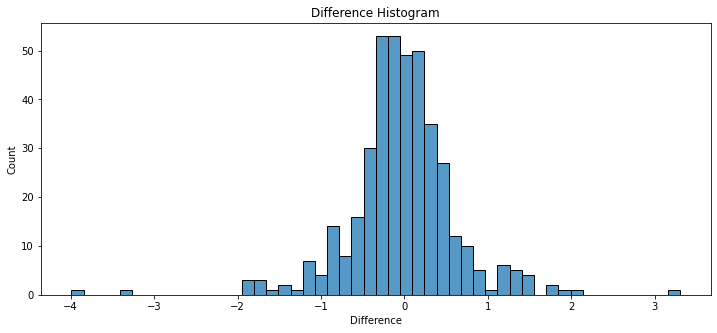

In [2504]:
# plot difference hist
f, axes = plt.subplots(figsize=(12,5))
sns.histplot(x='Difference', data=df_eval, kde=False, bins=50, ax=axes);
axes.set_title('Difference Histogram')

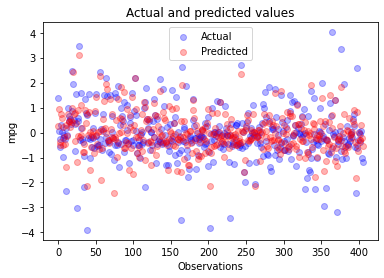

In [2505]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

## Linear Regressor

In [2506]:
from sklearn.linear_model import LinearRegression

In [2507]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
y_pred = reg_lin.predict(X_test)

In [2508]:
reg_lin.score(X_test, y_test)

0.598244924394717

In [2509]:
lista=[(i/np.abs(reg_lin.coef_).sum())*100 for i in reg_lin.coef_]

In [2510]:
df.columns[2:-1]

Index(['retail_and_recreation', 'grocery_and_pharmacy', 'residential',
       'transit_stations', 'parks', 'workplaces', 'contact_tracing',
       'testing_policy', 'international_travel_controls',
       'restrictions_internal_movements', 'close_public_transport',
       'public_information_campaigns', 'facial_coverings',
       'stay_home_requirements', 'restriction_gatherings',
       'cancel_public_events', 'workplace_closures', 'school_closures',
       'debt_relief', 'income_support', 'Holiday', 'temp', 'prcp',
       'doctors_per_1000', 'nurses_per_1000', 'beds_per_1000',
       'urban_population', 'total_vaccinations_per_100',
       '%youth_unemployment_total', 'life_expectancy',
       'Excess mortality P-scores, all ages Prev 18 days'],
      dtype='object')

In [2511]:
coeff_df = pd.DataFrame(lista, df.columns[2:-1], columns=['Coefficient'])
coeff_df

,Coefficient
retail_and_recreation,4.523055
grocery_and_pharmacy,4.585338
residential,8.341740
transit_stations,7.925231
parks,-10.451685
workplaces,-1.938199
contact_tracing,0.715290
testing_policy,-1.601370
international_travel_controls,-1.413222
restrictions_internal_movements,0.757890


In [2512]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Use against predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mse': mse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 0.44295541338977534
mse score is 0.42666327614446475
r2 score is 0.598244924394717


In [2513]:
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval['Difference']=np.abs(df_eval['Actual']-df_eval['Predicted'])
df_eval=df_eval.sort_values('Difference', ascending=False)
df_eval

,Actual,Predicted,Difference
1273,-3.520004,0.602492,4.122496
727,-3.436872,-0.175054,3.261818
579,4.017932,0.868952,3.148980
1249,0.122782,-1.920967,2.043749
135,1.873707,0.043929,1.829778
...,...,...,...
1519,-0.360277,-0.364112,0.003836
817,-0.320209,-0.316445,0.003765
1898,-0.621975,-0.625640,0.003665
1635,-0.273581,-0.275822,0.002242


Text(0.5, 1.0, 'Difference Histogram')

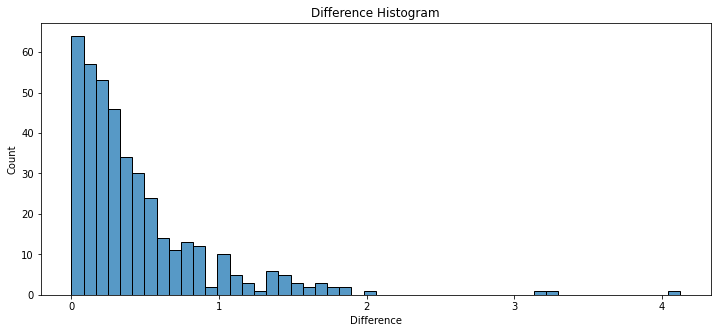

In [2514]:
# plot difference hist
f, axes = plt.subplots(figsize=(12,5))
sns.histplot(x='Difference', data=df_eval, kde=False, bins=50, ax=axes);
axes.set_title('Difference Histogram')

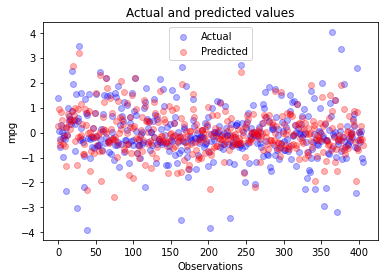

In [2515]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

## Lasso Regressor

In [2516]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
y_pred= model_lasso.predict(X_test)

In [2517]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mse': mse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 0.4412793506104601
mse score is 0.43268293283707754
r2 score is 0.5925766895948706


In [2518]:
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval['Difference']=df_eval['Actual']-df_eval['Predicted']
df_eval=df_eval.sort_values('Difference', ascending=False)
df_eval

,Actual,Predicted,Difference
579,4.017932,1.136687,2.881245
1249,0.122782,-2.027386,2.150168
1654,2.593309,0.706901,1.886408
135,1.873707,0.000964,1.872742
124,1.586146,-0.129047,1.715193
...,...,...,...
1435,-0.749612,1.016439,-1.766052
305,-3.017673,-1.224876,-1.792797
572,-3.186710,-1.257421,-1.929289
727,-3.436872,-0.205381,-3.231491


Text(0.5, 1.0, 'Difference Histogram')

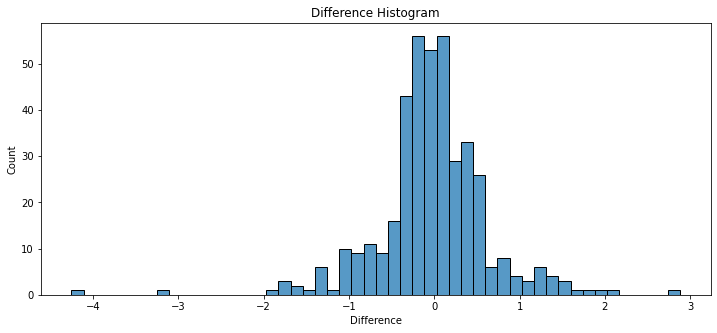

In [2519]:
# plot difference hist
f, axes = plt.subplots(figsize=(12,5))
sns.histplot(x='Difference', data=df_eval, kde=False, bins=50, ax=axes);
axes.set_title('Difference Histogram')

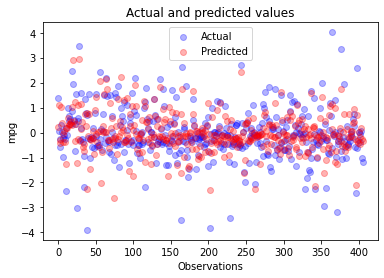

In [2520]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

## Ridge Regression

In [2521]:
rr = Ridge()
parameters = {'alpha':[1, 200]}
Ridge_reg= GridSearchCV(rr, parameters, scoring='r2',cv=5)
Ridge_reg.fit(X_train, y_train) 
y_pred= Ridge_reg.predict(X_test)

In [2522]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mse': mse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 0.4405651396490554
mse score is 0.4260214561406946
r2 score is 0.5988492755506678


In [2523]:
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval['Difference']=df_eval['Actual']-df_eval['Predicted']
df_eval=df_eval.sort_values('Difference', ascending=False)
df_eval

,Actual,Predicted,Difference
579,4.017932,0.869452,3.148479
1249,0.122782,-1.925203,2.047985
135,1.873707,0.046754,1.826952
1654,2.593309,0.821805,1.771504
124,1.586146,-0.155746,1.741891
...,...,...,...
572,-3.186710,-1.476595,-1.710115
305,-3.017673,-1.280066,-1.737608
1435,-0.749612,1.060382,-1.809995
727,-3.436872,-0.182009,-3.254863


Text(0.5, 1.0, 'Difference Histogram')

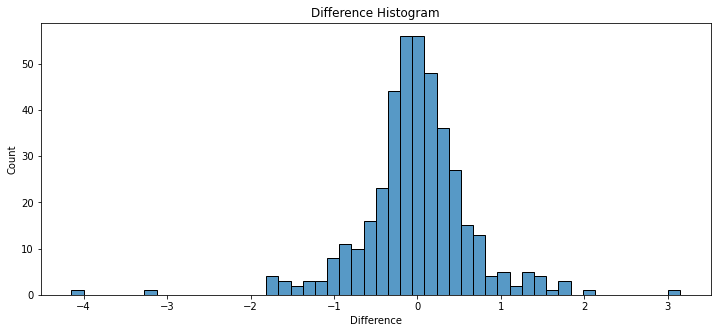

In [2524]:
# plot difference hist
f, axes = plt.subplots(figsize=(12,5))
sns.histplot(x='Difference', data=df_eval, kde=False, bins=50, ax=axes);
axes.set_title('Difference Histogram')

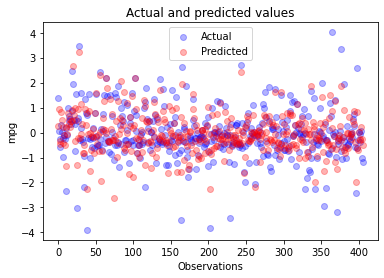

In [2525]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()

## Elastic Net

In [2526]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

0.6506737658027548
0.56945580157574
0.6539026222335876
0.5973735830091378


## Decision Tree

In [2527]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

reg = GridSearchCV(DecisionTreeRegressor(),
                   param_grid={"min_samples_leaf":np.arange(20,1000,100),
                               "max_depth":np.arange(3,10)
                               }
                   ,
                   )

reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [2528]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mse': mse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 0.4596894990905028
mse score is 0.4438678865468784
r2 score is 0.5820447029567679


In [2529]:
df_eval = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_eval['Difference']=df_eval['Actual']-df_eval['Predicted']
df_eval=df_eval.sort_values('Difference', ascending=False)
df_eval

,Actual,Predicted,Difference
579,4.017932,1.054795,2.963137
135,1.873707,-0.159356,2.033062
680,-0.052194,-1.957791,1.905597
124,1.586146,-0.159356,1.745501
210,1.413094,-0.171692,1.584786
...,...,...,...
307,-3.832062,-1.957791,-1.874271
306,-3.899886,-1.957791,-1.942095
1402,-2.950336,-0.760310,-2.190026
727,-3.436872,-0.159356,-3.277517


Text(0.5, 1.0, 'Difference Histogram')

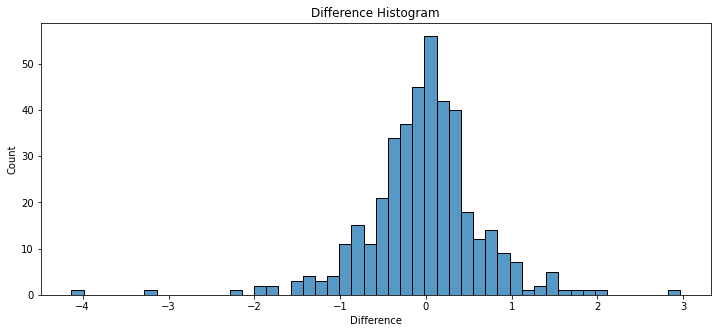

In [2530]:
# plot difference hist
f, axes = plt.subplots(figsize=(12,5))
sns.histplot(x='Difference', data=df_eval, kde=False, bins=50, ax=axes);
axes.set_title('Difference Histogram')

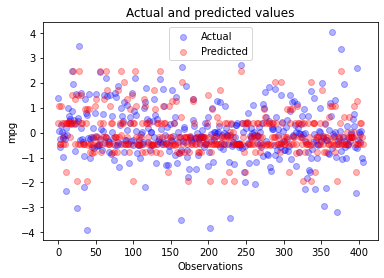

In [2531]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('mpg')
plt.legend()
plt.show()